In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Text(0,0.5,'comment_frequency')

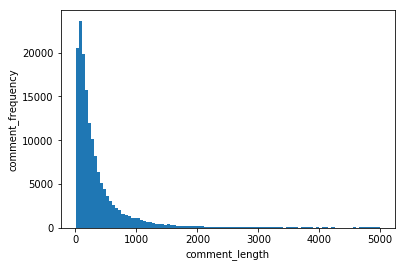

In [9]:
train['length'] = train['comment_text'].apply(len)
axis = train['length'].plot(bins=100, kind="hist")
axis.set_xlabel("comment_length")
axis.set_ylabel("comment_frequency")

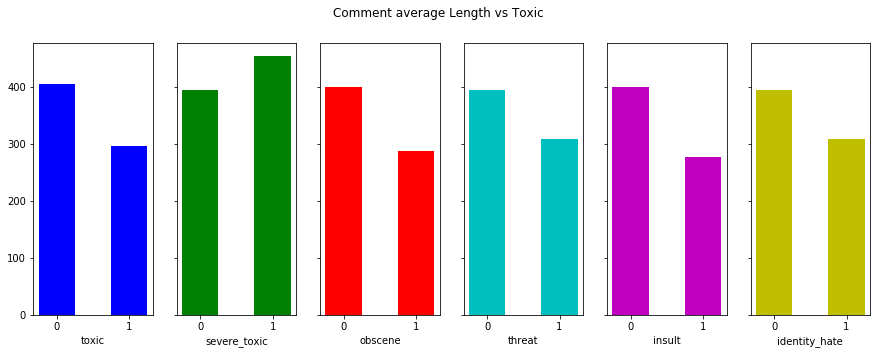

In [10]:
colors = ('b','g','r','c','m','y')
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

f, axes = plt.subplots(1, 6, sharey=True, figsize=(15,5))
f.suptitle('Comment average Length vs Toxic')

for i, label in enumerate(labels):
    
    data = train.groupby(label).mean()['length']
    
    axes[i].bar(data.index.values, data, width=0.5, color=colors[i])
    
    axes[i].set_xlabel(label)
    

In [3]:
train.toxic.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train.severe_toxic.value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [6]:
train.obscene.value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

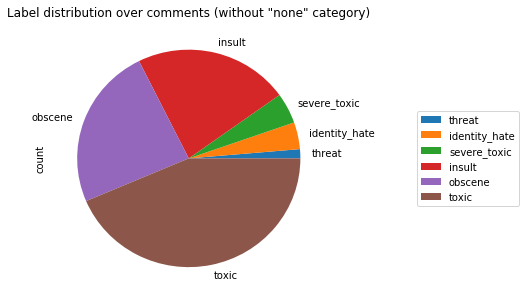

In [11]:
df_distribution = train[labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count', title='Label distribution over comments (without "none" category)',figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [12]:
df_distribution.sort_values('count', ascending=False)

,count
toxic,15294
obscene,8449
insult,7877
severe_toxic,1595
identity_hate,1405
threat,478


In [7]:
train.shape

(159571, 8)

In [14]:
(159571 - 15294 - 8446 -7877 - 1595 - 1405 -478)/159571 #at least how much normal comments there are at least  

0.7800665534464283

In [9]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [10]:
test.shape

(153164, 2)

In [14]:
pd.crosstab(train.toxic, train.severe_toxic)
# severe_toxic => toxic

severe_toxic,0,1
toxic,,
0,144277,0
1,13699,1595


In [16]:
pd.crosstab(train.toxic, train.obscene)
# obscene can not infer toxic

obscene,0,1
toxic,,
0,143754,523
1,7368,7926


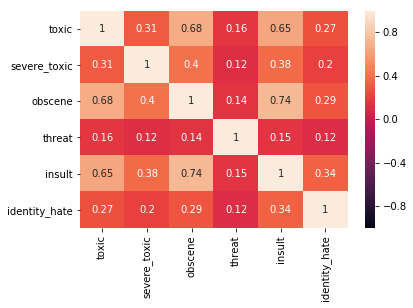

In [21]:
from seaborn import heatmap
from IPython.display import display # Allows the use of display() for DataFrames
# Import supplementary visualizations code visuals.py
# Pretty display for notebooks
%matplotlib inline
heatmap(train.iloc[:, 2:8].corr(), vmin=-1, vmax=1, annot=True)$
#max corr is btw obscene and insult

In [22]:
train[train.comment_text.isnull()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [23]:
train[train.comment_text == '']

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [24]:
train['comment_length'] = train.comment_text.str.len()
train.comment_length.describe()
# mean is much larger than median, max is up to 5000, I guess it's comment limit on wiki talk

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_length, dtype: float64

In [25]:
train = train.sort_values(by="comment_length", ascending=False)
pd.set_option('display.max_colwidth', -1)
train.comment_text.head()
#large comment mostly due to repeated expression

46583    hahahahahahahahahahahahahahahahahaha vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism rules vandalism 

In [26]:
train = train.sort_values(by='toxic', ascending=False)
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(train.comment_text)
X = vectorizer.transform(train.comment_text)

In [27]:
X.shape

(159571, 189460)

In [28]:
X_toxic = X[0:15294, :]
X_non_toxic = X[15294: , :]

In [29]:
def get_most_repr_word(doc_term_arry, a_vectorizer):
    means = np.asarray(np.mean(doc_term_arry, axis=0))
    top_ten = np.argsort(-means)[:10]

    for ind in range(10):
        print(ind + 1, ":", a_vectorizer.get_feature_names()[top_ten[0, ind]])

In [30]:
print("most freq words in toxic")
get_most_repr_word(X_toxic, vectorizer)
print("most freq words in non toxic")
get_most_repr_word(X_non_toxic, vectorizer)
# huge diff of employed term in toxic and no toxic comments 

most freq words in toxic
1 : fuck
2 : fucking
3 : shit
4 : like
5 : don
6 : ass
7 : bitch
8 : stupid
9 : suck
10 : wikipedia
most freq words in non toxic
1 : article
2 : talk
3 : page
4 : wikipedia
5 : just
6 : thanks
7 : like
8 : don
9 : edit
10 : think
